# Problem Statement 1

In [1]:
# importing Librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the data set
dt1=pd.read_csv('dataset_1.csv')

In [3]:
dt1

,Id,Feature_1,Feature_2,Feature_3,Feature_4,target
0,1,5.1,3.5,1.4,0.2,Class_1
1,2,4.9,3.0,1.4,0.2,Class_1
2,3,4.7,3.2,1.3,0.2,Class_1
3,4,4.6,3.1,1.5,0.2,Class_1
4,5,5.0,3.6,1.4,0.2,Class_1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Class_3
146,147,6.3,2.5,5.0,1.9,Class_3
147,148,6.5,3.0,5.2,2.0,Class_3
148,149,6.2,3.4,5.4,2.3,Class_3


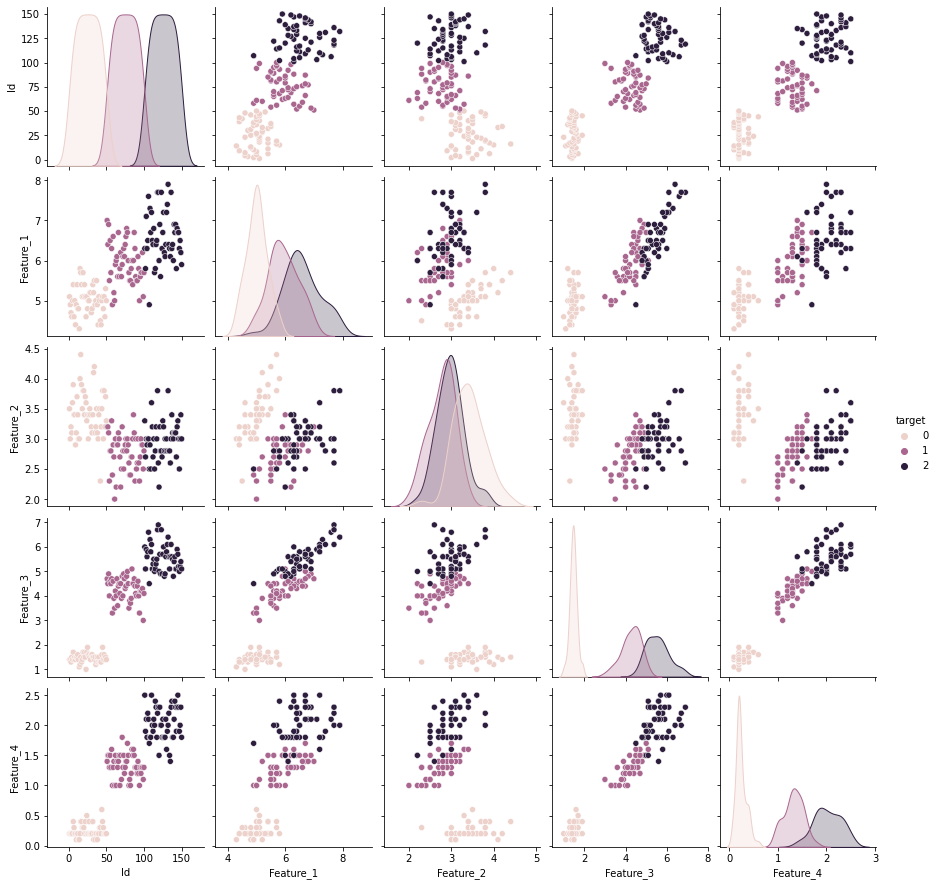

In [17]:
# Finding relation ship between feature and feature
sns.pairplot(dt1,hue='target')

In [5]:
# analysing the data set
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         150 non-null    int64  
 1   Feature_1  150 non-null    float64
 2   Feature_2  150 non-null    float64
 3   Feature_3  150 non-null    float64
 4   Feature_4  150 non-null    float64
 5   target     150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [115]:
# Droping the Id column
dt1.drop(columns='Id',inplace=True)

In [116]:
# Finding the no of unique values in target column
lable=dt1['target'].unique()
lable

array([0, 1, 2], dtype=int64)

In [117]:
# Counting the values in target columns
values=dt1['target'].value_counts().values

([<matplotlib.patches.Wedge at 0x20f79255e20>,
 [Text(0.5499999702695115, 0.9526279613277875, '0'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, '1'),
  Text(0.5500001486524352, -0.9526278583383436, '2')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.33%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.33%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.33%')])

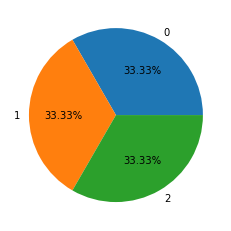

In [118]:
# Ploted the pie chart for the target column
plt.pie(values,labels=lable,autopct='%1.2f%%')

In [119]:
dt1.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [120]:
# Finding the missing values in the data set.
dt1.isnull().sum()

Feature_1    0
Feature_2    0
Feature_3    0
Feature_4    0
target       0
dtype: int64

In [121]:
# Replacing the object variables into an numerical values
dt1['target'].replace(['Class_1', 'Class_2','Class_3'],
                        [0, 1,2], inplace=True)

In [168]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  150 non-null    float64
 1   Feature_2  150 non-null    float64
 2   Feature_3  150 non-null    float64
 3   Feature_4  150 non-null    float64
 4   target     150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [122]:
dt1

,Feature_1,Feature_2,Feature_3,Feature_4,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [123]:
# Spliting the Independent & dependent features
x = dt1.drop(columns='target')
y=dt1['target']

In [124]:

y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [125]:
# Performing Train test split 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score , roc_curve

In [126]:
x_train , x_test, y_train,y_test = train_test_split(x,y,test_size = .20,random_state=20)

## Performing Random Forest 

In [127]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=2)

In [128]:
rf.score(x_test,y_test)

0.9

In [129]:
# Hyperparameter Tuning with Gridsearch Cv
from sklearn.model_selection import GridSearchCV

In [130]:
# Assigning values with parameters
grid_pram = {
    "n_estimators" : [5,10 , 50 , 100 , 120 , 150],
    'criterion' :['gini' ,'entropy'],
    'max_depth' :range(3),
    'min_samples_leaf' :range(3)
    
}

In [131]:
grid_serach_rf = GridSearchCV(param_grid= grid_pram, cv = 10 , n_jobs=6,verbose=1 ,estimator = rf)

In [132]:
grid_serach_rf.fit(x_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


C:\Users\Dhvani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dhvani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dhvani\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Dhvani\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Dhvani\anaconda3\lib\site-pa

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=2), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 3),
                         'min_samples_leaf': range(0, 3),
                         'n_estimators': [5, 10, 50, 100, 120, 150]},
             verbose=1)

In [133]:
grid_serach_rf.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'n_estimators': 120}

In [134]:
grid_serach_rf.best_score_

0.975

In [139]:
rf_new = RandomForestClassifier(criterion='gini' , max_depth=1 , min_samples_leaf= 1, n_estimators=120)

In [140]:
rf_new.fit(x_train,y_train)

RandomForestClassifier(max_depth=1, n_estimators=120)

In [141]:
rf_new.score(x_test,y_test)

0.9

In [142]:
accuracy_score(y_test,rf_new.predict(x_test))

0.9

## Xg Boost

In [143]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)


0.8666666666666667

### Problem statement 1-Conclusion
    1-Did EDA for the data 
    2-And used Xgboost and Random forest algorithem to solve this problem

# Problem Statement 2

In [107]:
#Reading another dataset
dt2=pd.read_csv('dataset_2.csv')

In [108]:
dt2.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Target
0,1,6.1,4,4.4,4.2,0,5.5,Class_1
1,2,5.9,1,4.4,4.2,3,5.0,Class_1
2,3,5.7,4,4.3,4.2,2,5.2,Class_1
3,4,5.6,2,4.5,4.2,0,5.1,Class_1
4,5,6.0,5,4.4,4.2,1,5.6,Class_1


In [109]:
# Finding Unique values in target column
dt2['Target'].unique()

array(['Class_1', 'Class_2', 'Class_3'], dtype=object)

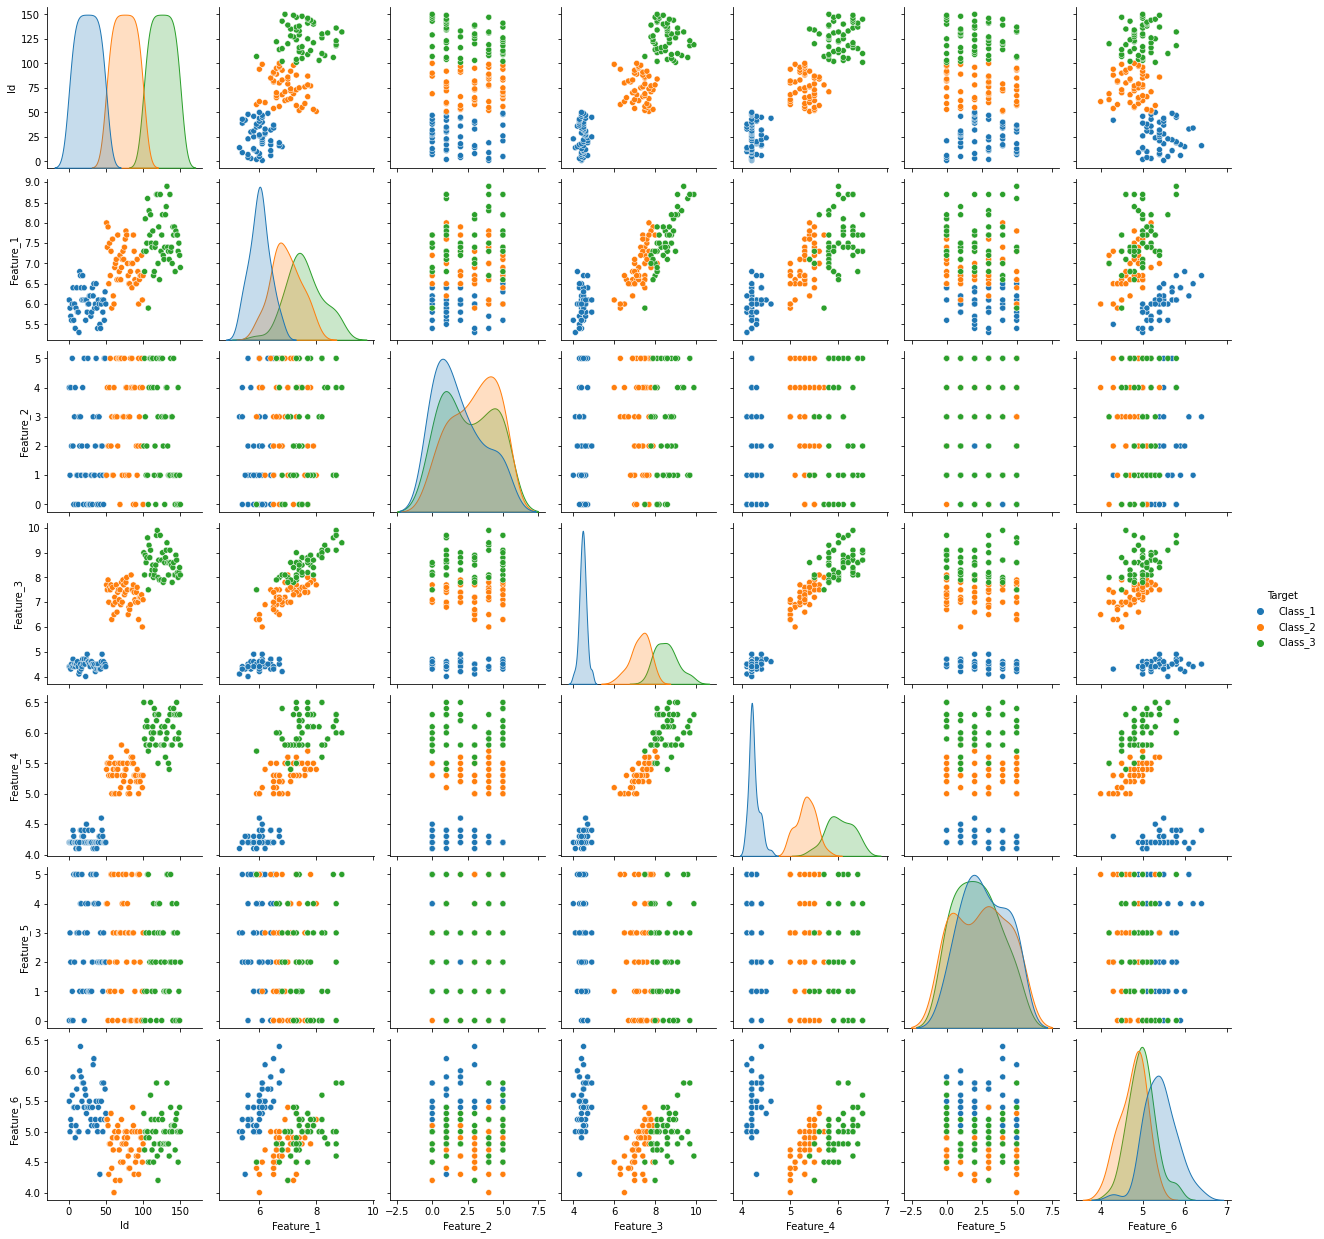

In [110]:
# Finding relation between features
sns.pairplot(dt2,hue='Target')

In [111]:
# Finding missing values in data
dt2.isnull().sum()

Id           0
Feature_1    0
Feature_2    0
Feature_3    0
Feature_4    0
Feature_5    0
Feature_6    0
Target       0
dtype: int64

In [144]:
# Droping id columns in dataset
dt2.drop(columns='Id',inplace=True)

In [147]:
# getting statistical features in dataset
dt2.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,6.843333,2.453333,6.758667,5.198667,2.426667,5.054000
std,0.828066,1.759296,1.764420,0.763161,1.676312,0.433594
min,5.300000,0.000000,4.000000,4.100000,0.000000,4.000000
25%,6.100000,1.000000,4.600000,4.300000,1.000000,4.800000
50%,6.800000,2.000000,7.350000,5.300000,2.000000,5.000000
75%,7.400000,4.000000,8.100000,5.800000,4.000000,5.300000
max,8.900000,5.000000,9.900000,6.500000,5.000000,6.400000


<AxesSubplot:>

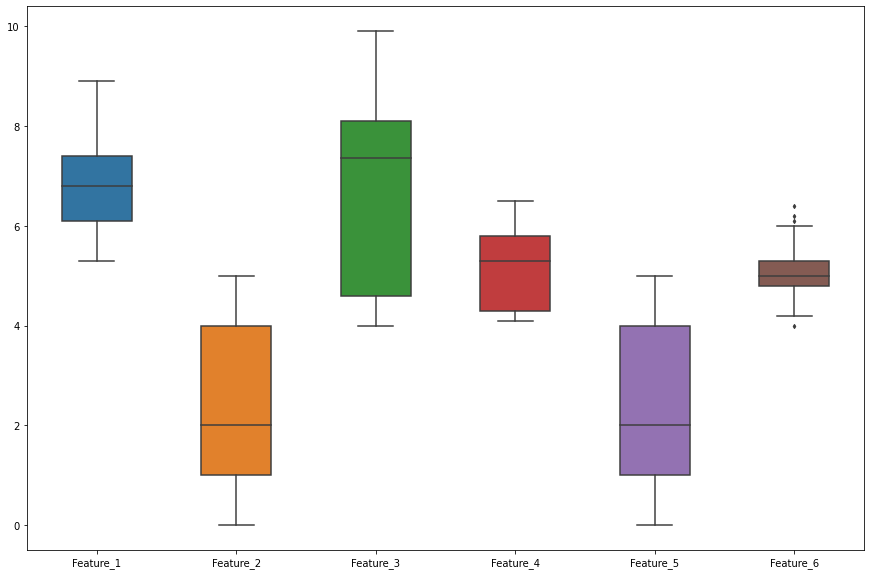

In [152]:
# Finding Outliers in dataset
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dt2, width= 0.5,ax=ax,  fliersize=3)


In [155]:
# finding unique values in Target colums
values=dt2['Target'].value_counts().values
values

array([50, 50, 50], dtype=int64)

In [156]:
# Replacing the values with numerical values
dt2['Target'].replace(['Class_1', 'Class_2','Class_3'],[0, 1,2], inplace=True)

C:\Users\Dhvani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dhvani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dhvani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

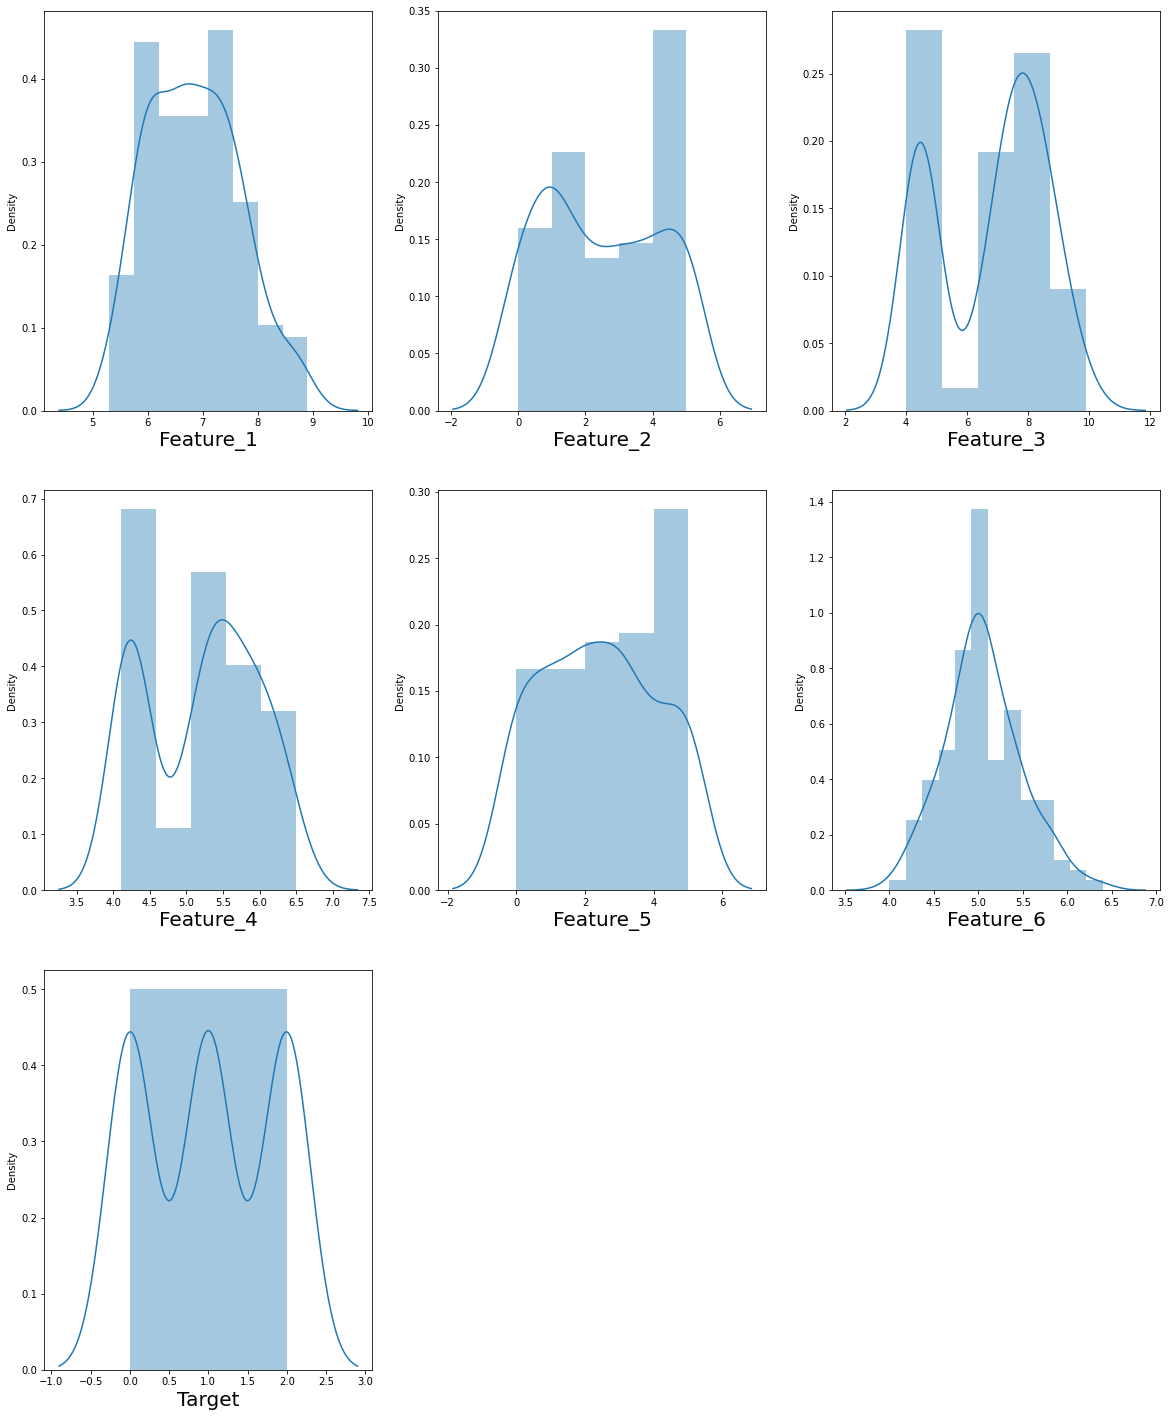

In [157]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dt2:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(dt2[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [158]:
# Spliting independent and dependent features
x2= dt2.drop(columns='Target')
y2=dt2['Target']

In [163]:
y2

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Target, Length: 150, dtype: int64

In [159]:
# performing train test split of the data
from  sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x2,y2,test_size=0.20, random_state=42)

In [161]:
# using Support vector Classifier
from sklearn.svm import SVC
model=SVC()
model.fit(train_x,train_y)

SVC()

In [164]:
model.predict(test_x)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [165]:
accuracy_score(test_y,model.predict(test_x))

1.0

In [166]:
clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf2.fit(train_x, train_y)
clf2.score(test_x, test_y)

0.9666666666666667

### Problem statement 2-Conclusion
    1-Did EDA for the data 
    2-And used support vector classifier and gradiant boosting to solve this problem